# 1. Data Loading

- Importing the dataset and viewing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

# 2. Data Preprocessing

### Cleaning the data
Dropping the columns that are irrelevant for our analysis.

In [6]:
#Here the columns instant, dteday, casual, registered are of no use to us so droppibg them

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

### Converting non binary values to the original values

In [7]:
# Changing the non binary values for 'season' columns
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Changing the non binary values for 'mnth' columns
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Changing the non binary values for 'weekday' columns
df['weekday'] = df['weekday'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

# Changing the non binary values for 'weathersit' columns
df['weathersit'] = df['weathersit'].map({1:'clear', 2:'misty', 3:'light', 4:'heavy'})


In [8]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,misty,14.902598,17.68695,69.6087,16.652113,801


# 3. Exploratory Data Analysis

### Visualizing continuous data

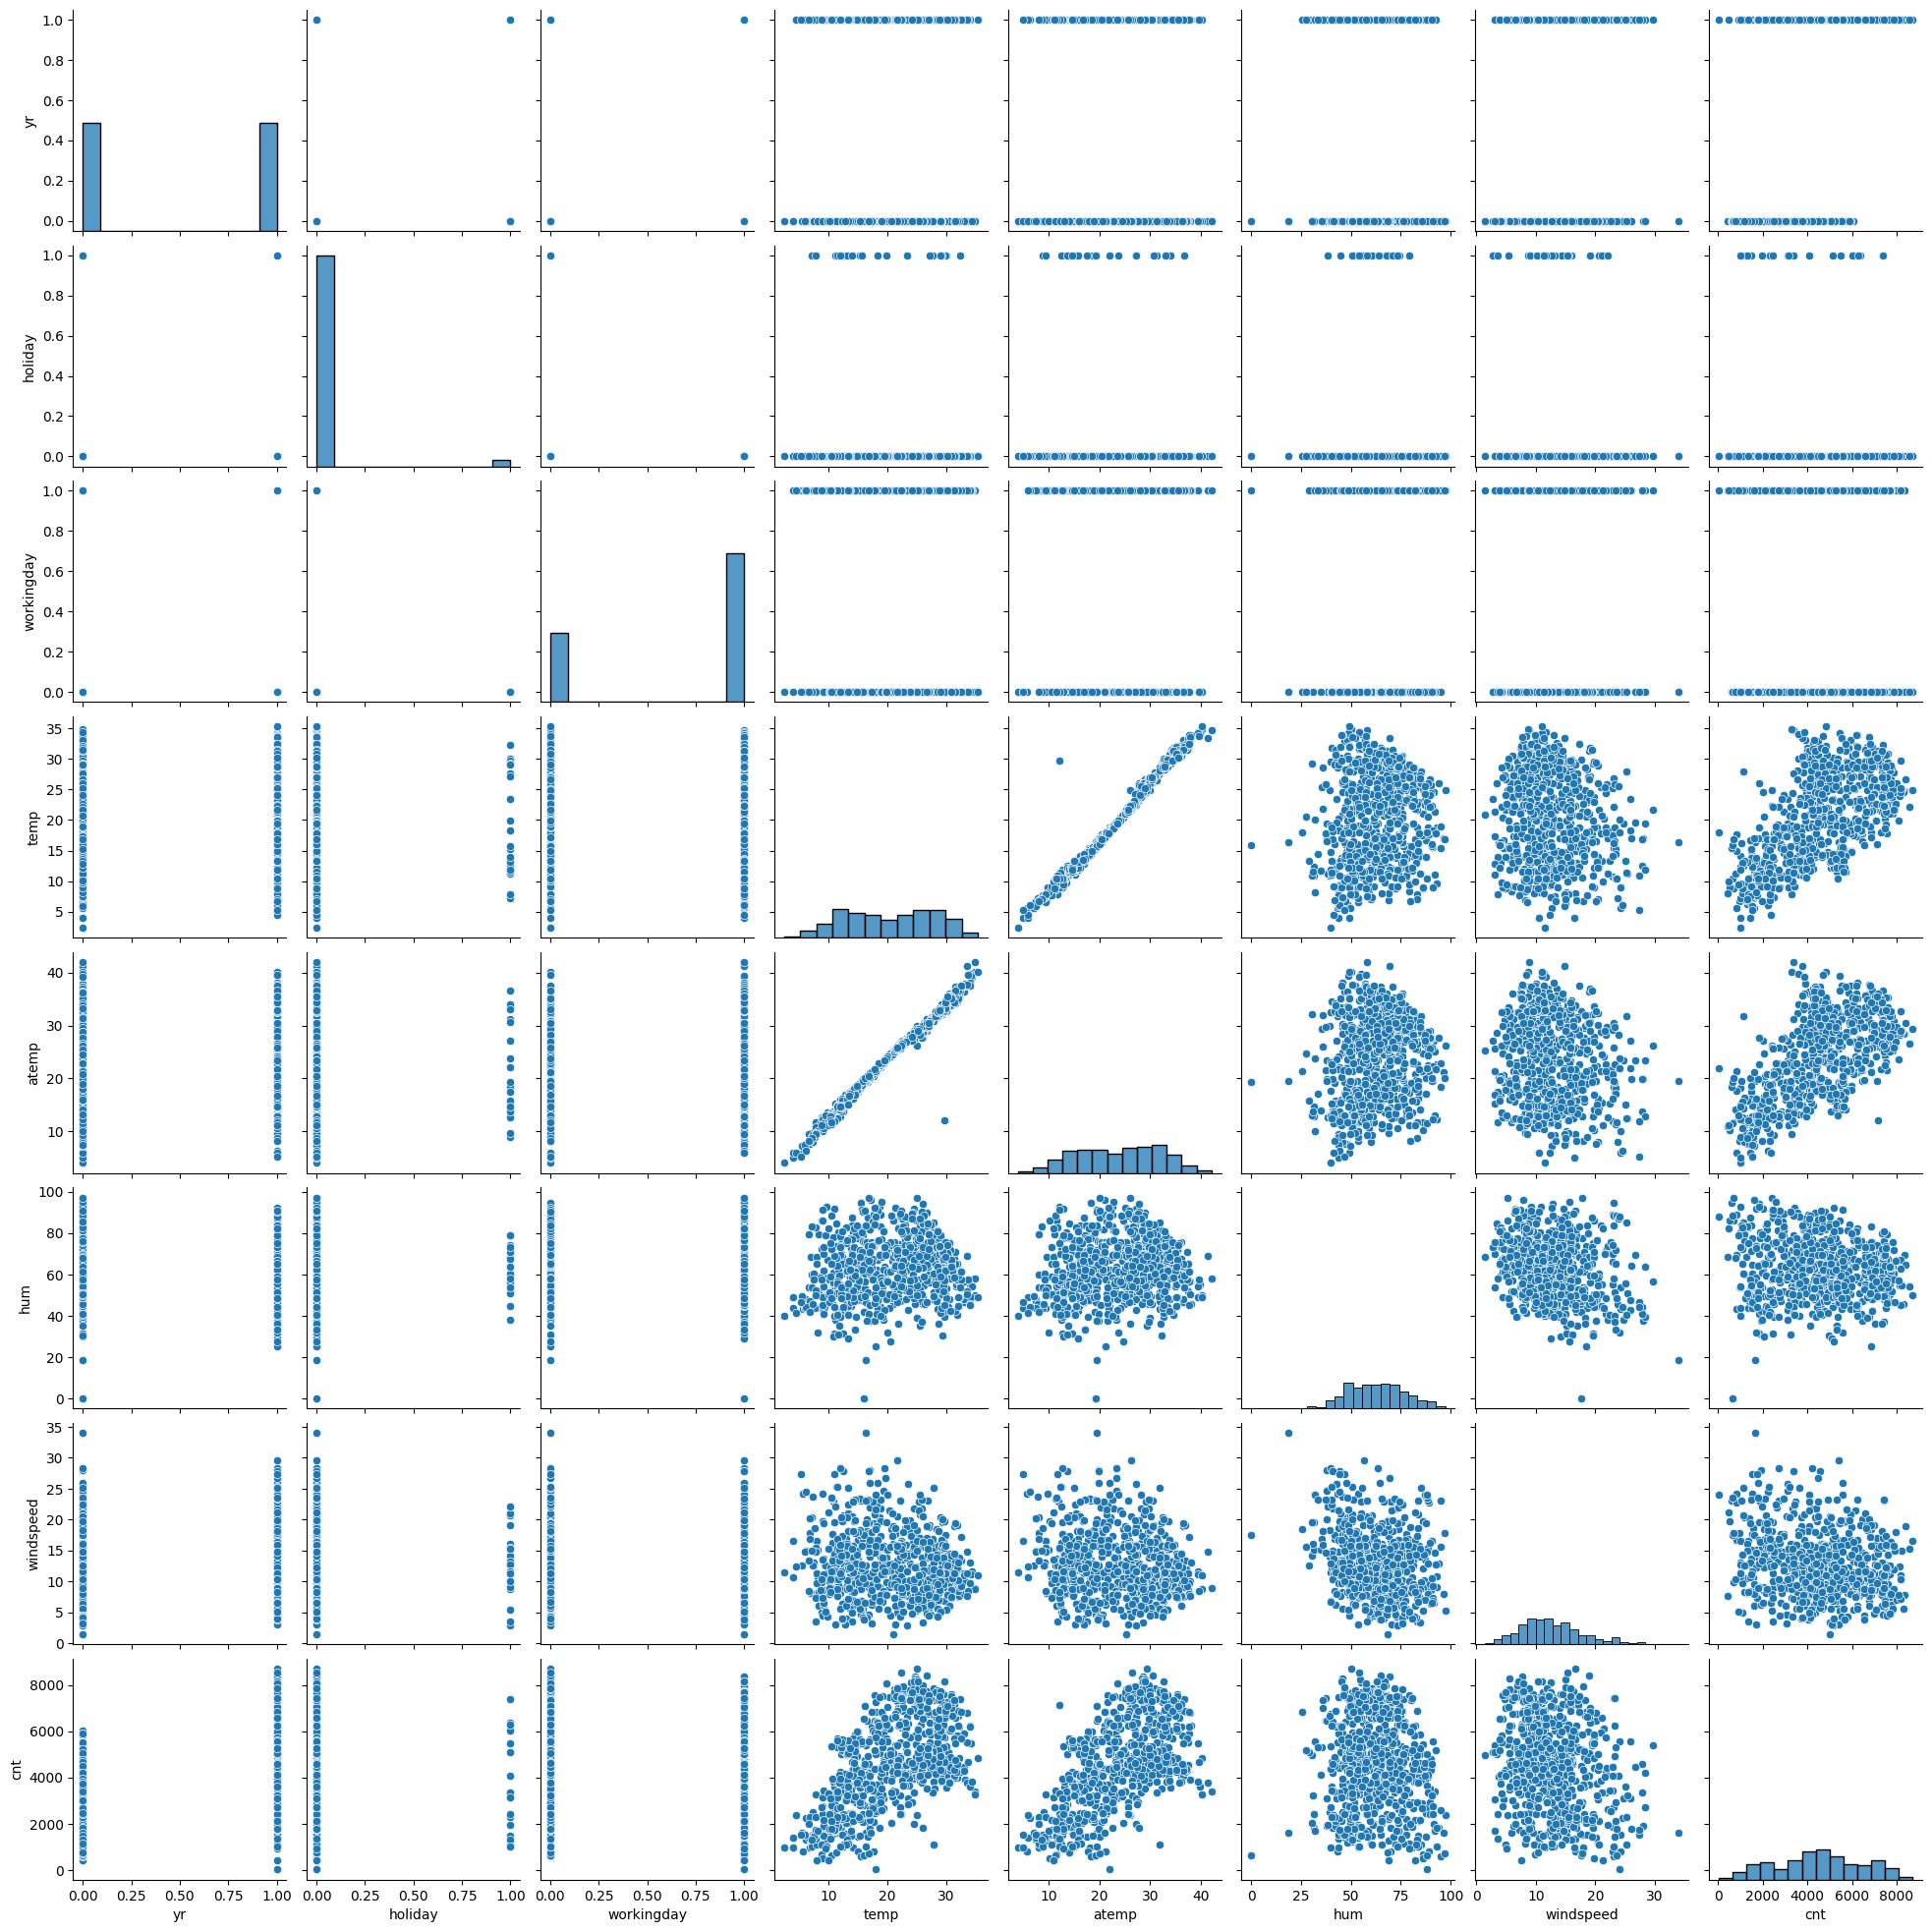

In [9]:
sns.pairplot(df);

Here the column temp, atemp describe some sort of linear relation with the cnt

### Visiualizing categorical data

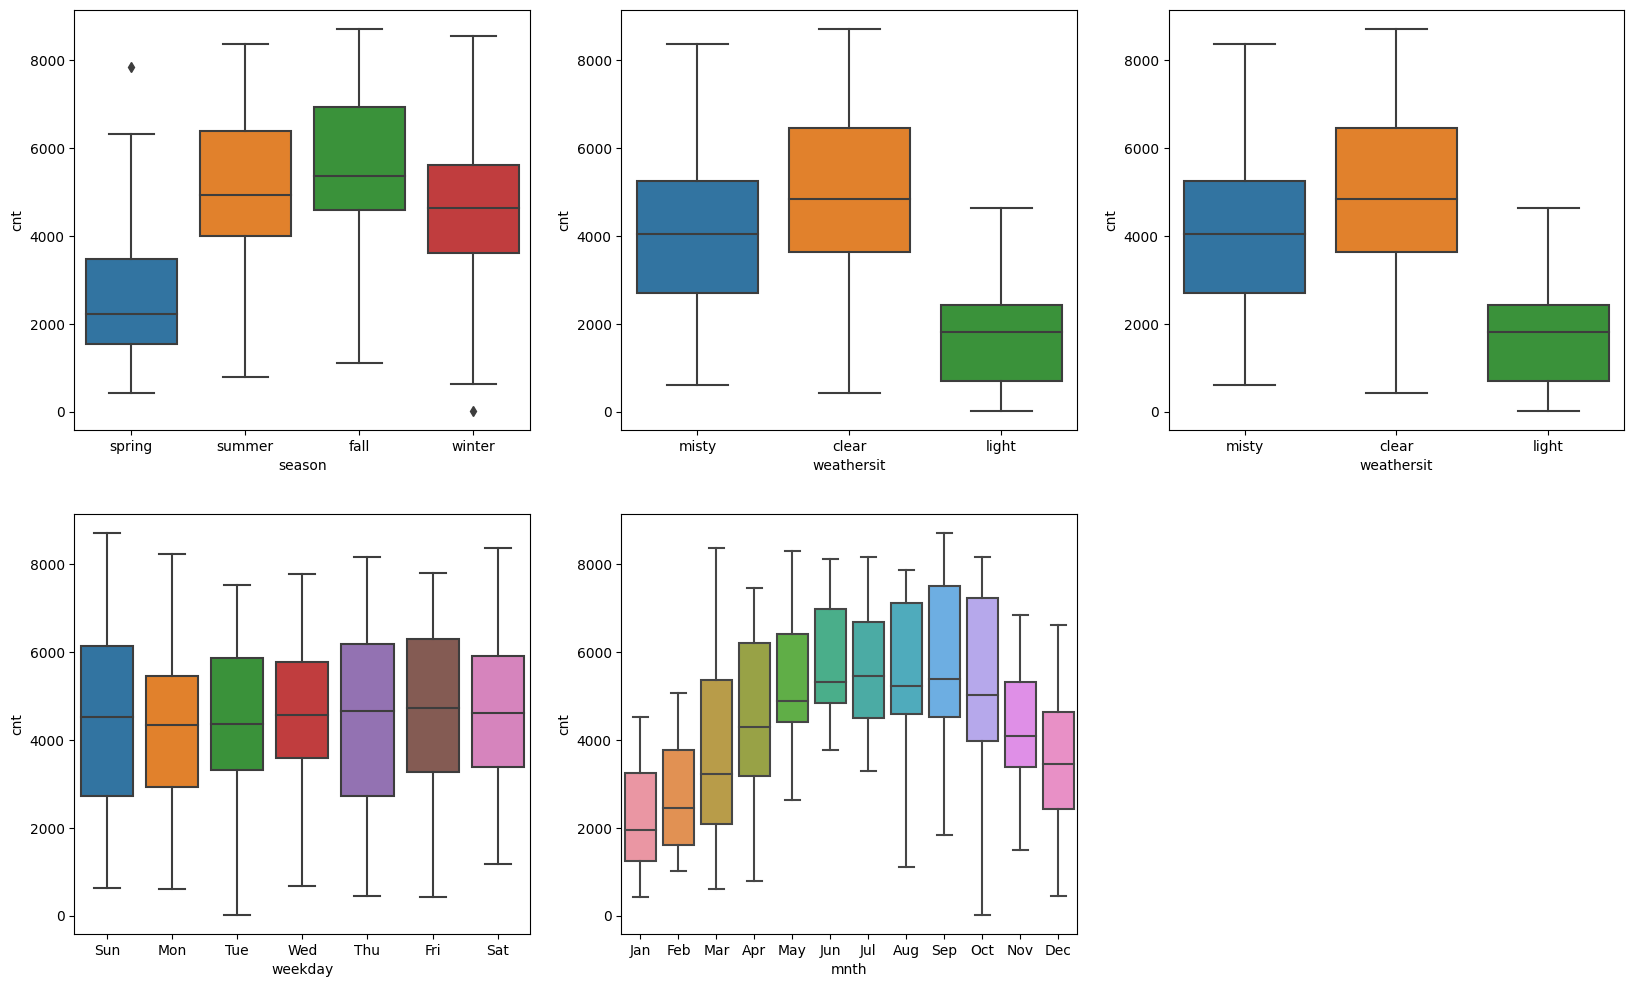

In [10]:
plt.figure(figsize=(20, 12))


plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)


plt.subplot(2, 3, 2)
sns.boxplot(x='weathersit', y='cnt', data=df)


plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y='cnt', data=df)


plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=df)


plt.subplot(2, 3, 5)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.show()

<AxesSubplot:>

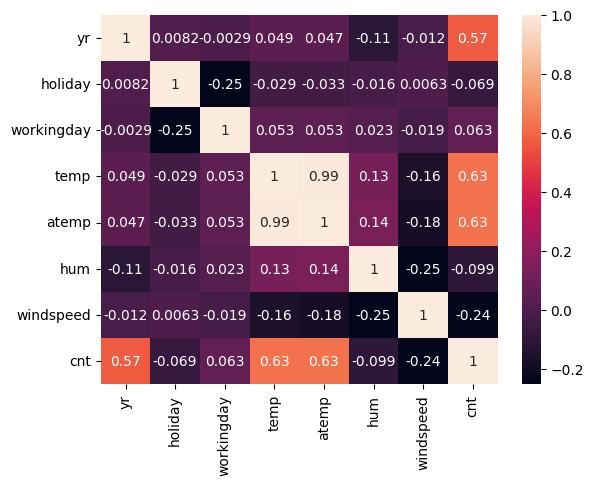

In [11]:
sns.heatmap(df.corr(), annot=True)

# 4. Creating dummies

In [12]:
season_dummy = pd.get_dummies(df['season'], drop_first=True)
mnth_dummy = pd.get_dummies(df['mnth'], drop_first=True)
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)

df = pd.concat([df, season_dummy, mnth_dummy, weathersit_dummy, weekday_dummy], axis=1)
df = df.drop(['season', 'mnth', 'weathersit', 'weekday'], axis=1)

In [13]:
df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,light,misty,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,1,0,0,0,0,0


# 5. Train Test Split

In [14]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

print(df_train.shape, df_test.shape)

(510, 30) (220, 30)


# 6. Scaling 

In [15]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,light,misty,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,1,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,1,0,0,0,0


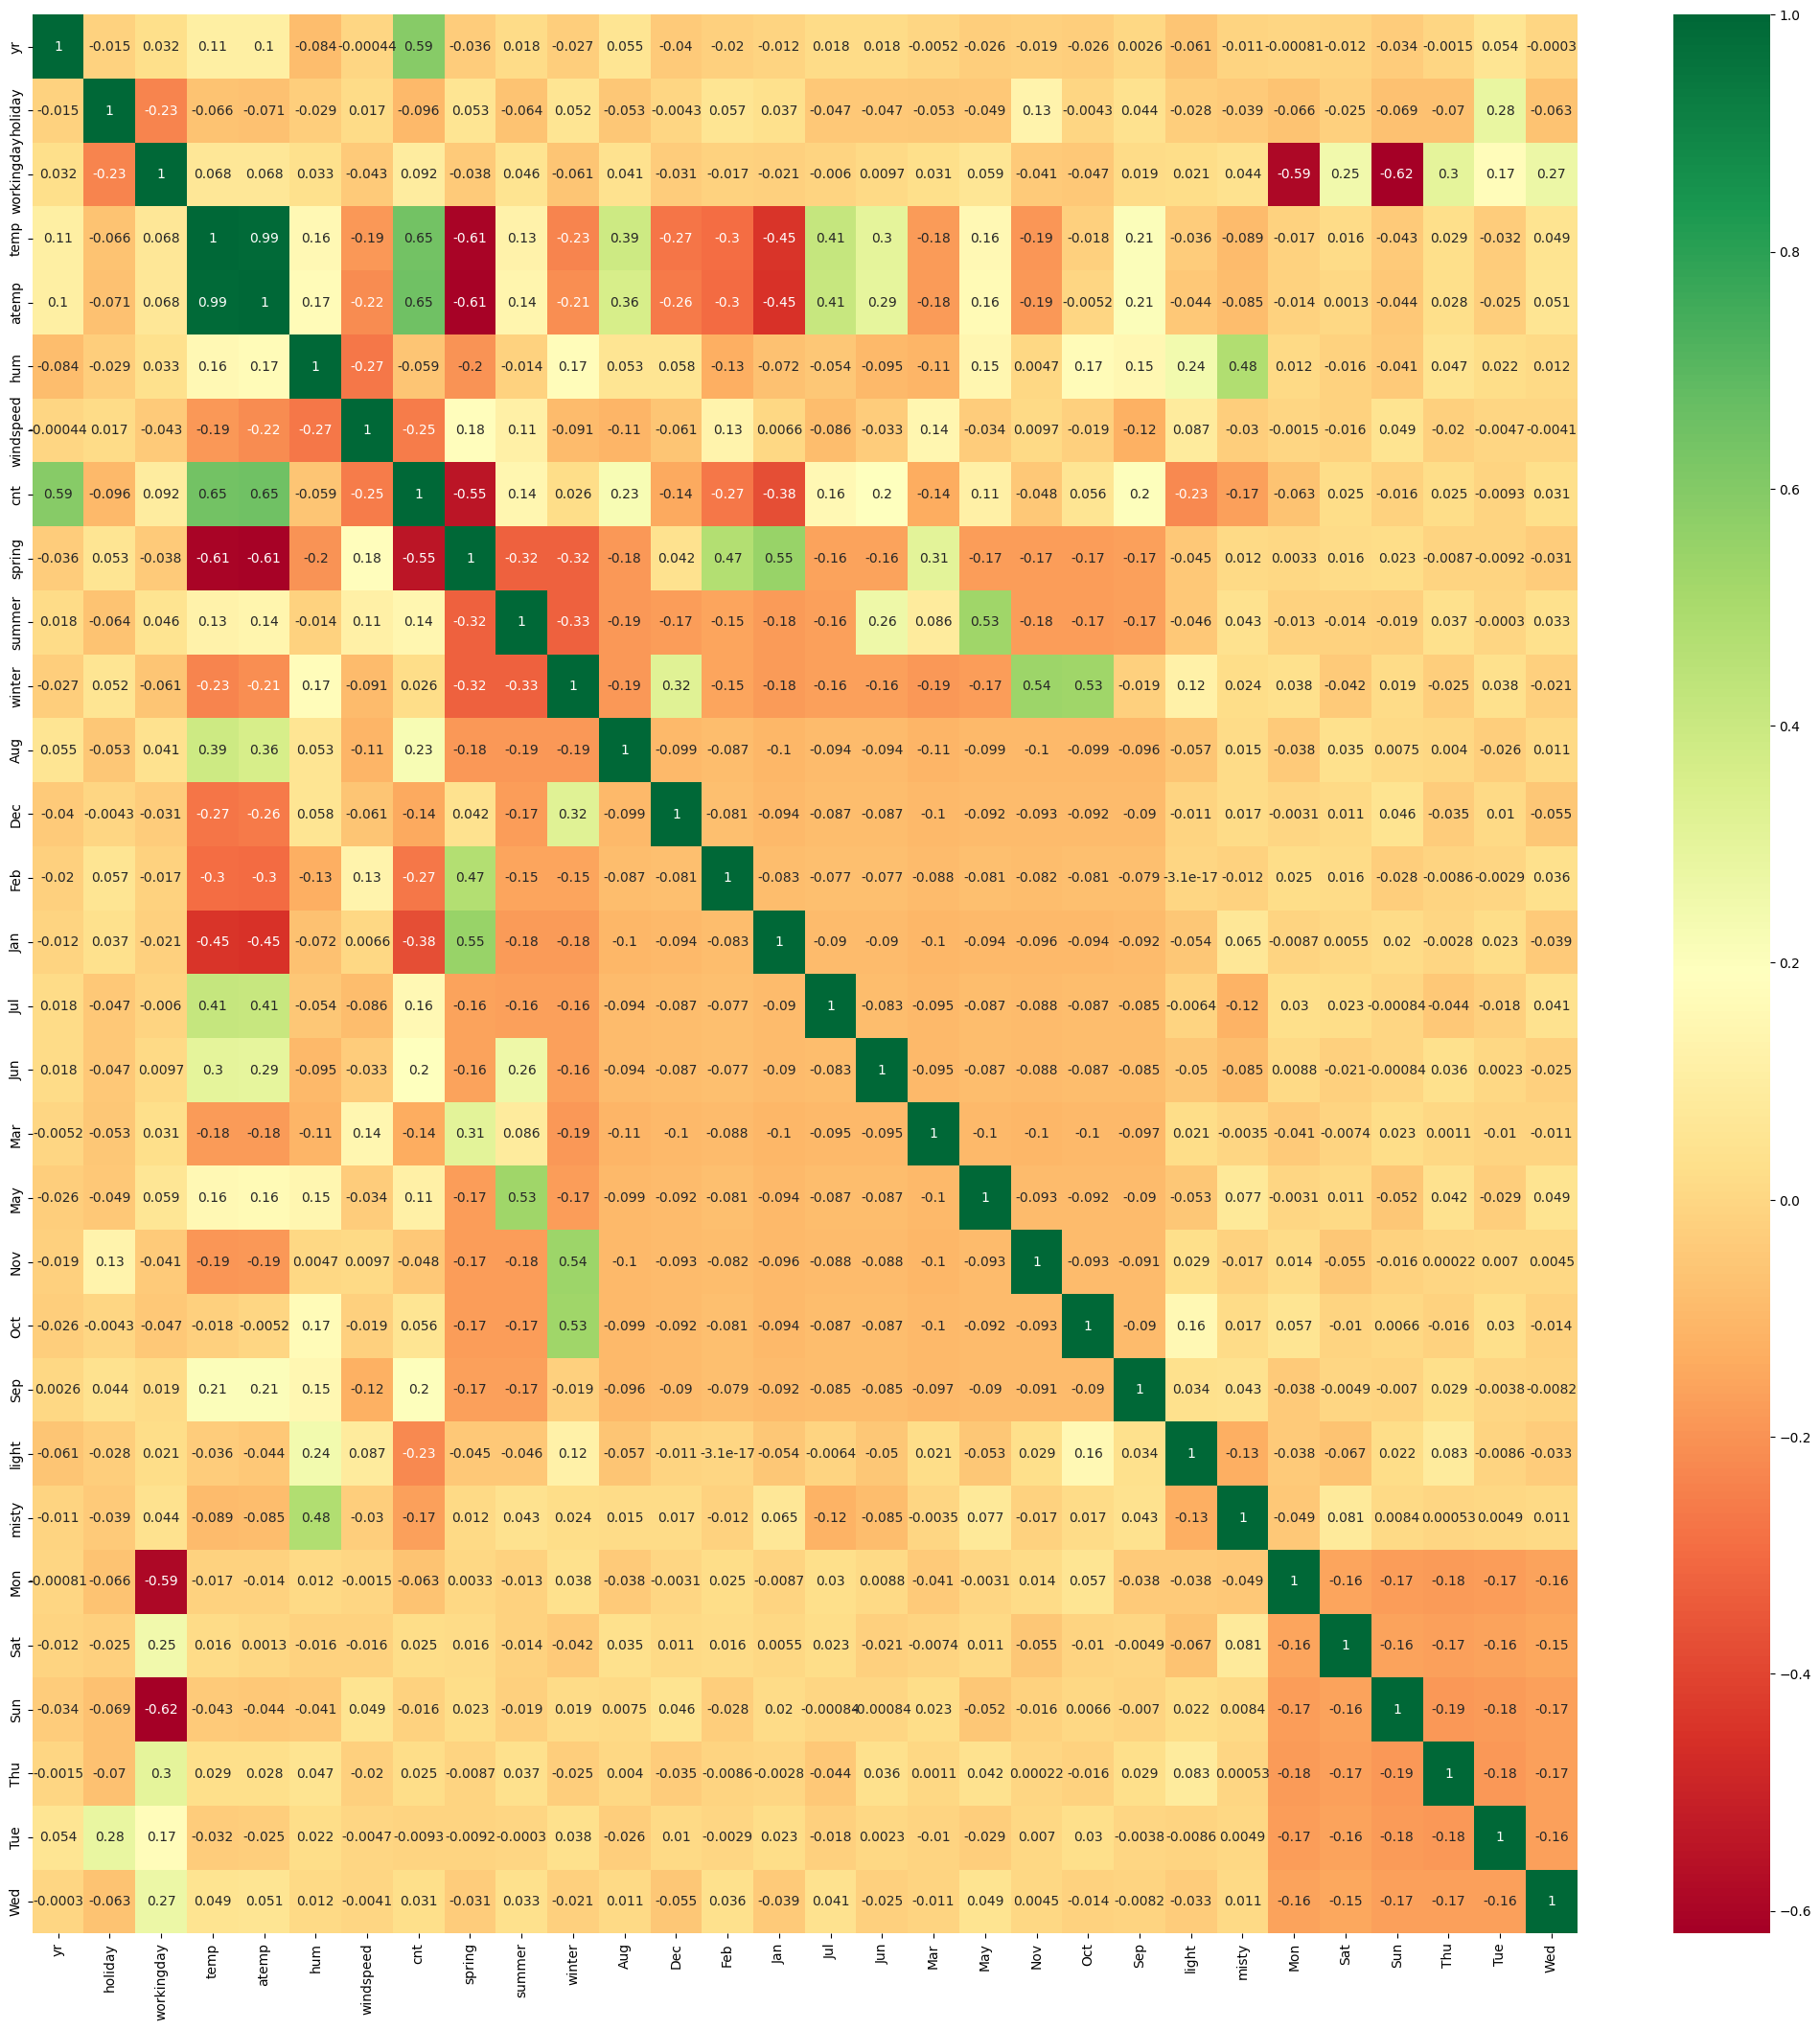

In [16]:
plt.figure(figsize=(26, 26))
colormap = 'RdYlGn'
sns.heatmap(df_train.corr(), annot=True, cmap=colormap)
plt.show()

In [17]:
y_train = df_train.pop('cnt')
X_train = df_train

In [18]:
#Adding a constant
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.81e-180
Time:                        20:34:34   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.035      6.761      0.000       0.170       0.309
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0051      0.024      0.210      0.833      -0.042       0.052
workingday     0.0904      0.012      7.292      0.000       0.066       0.115
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
light         -0.2550      0.026     -9.631      0.000      -0.307      -0.203
misty         -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Mon            0.0448      0.014      3.239      0.001       0.018       0.072
Sat            0.0097      0.016      0.623      0.534      -0.021       0.040
Sun            0.0991      0.014      7.274      0.000       0.072       0.126
Thu            0.0038      0.015      0.261      0.794      -0.025       0.033
Tue           -0.0119      0.015     -0.785      0.433      -0.042       0.018
Wed           -0.0087      0.015     -0.564      0.573      -0.039       0.022
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.43e+15
==============================================================================

N

In [19]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,86.43
3,temp,66.90
4,atemp,56.03
25,Sun,19.71
23,Mon,18.34
7,spring,10.77
9,winter,9.46
8,summer,8.29
18,Nov,6.79
19,Oct,6.47


In [20]:
X = X_train

def remove_and_makemodel(columnName):
    global X
    X = X.drop(columnName, axis=1)
    
    X_train_sm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()

    
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)

    print(lr_model.summary())
    print(vif)    

### Removing the columns with High p and low VIF

In [21]:
remove_and_makemodel('holiday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.81e-180
Time:                        20:34:34   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2445      0.052      4.678      0.0

In [22]:
remove_and_makemodel('spring')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.7
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          8.49e-181
Time:                        20:34:34   Log-Likelihood:                 525.92
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     482   BIC:                            -877.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.049      4.425      0.0

In [23]:
remove_and_makemodel('Aug')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.37e-181
Time:                        20:34:34   Log-Likelihood:                 524.78
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     483   BIC:                            -881.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2311      0.048      4.829      0.0

In [24]:
remove_and_makemodel('Jun')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.72e-182
Time:                        20:34:34   Log-Likelihood:                 524.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     484   BIC:                            -887.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2336      0.048      4.902      0.0

In [25]:
remove_and_makemodel('Mar')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          7.65e-183
Time:                        20:34:35   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -890.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2020      0.043      4.721      0.0

In [26]:
remove_and_makemodel('May')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.9
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.09e-183
Time:                        20:34:35   Log-Likelihood:                 522.90
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     486   BIC:                            -896.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.042      4.636      0.0

In [27]:
remove_and_makemodel('Oct')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.6
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          9.69e-185
Time:                        20:34:35   Log-Likelihood:                 522.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     487   BIC:                            -902.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1958      0.042      4.668      0.0

In [28]:
remove_and_makemodel('Sat')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.02e-185
Time:                        20:34:35   Log-Likelihood:                 522.67
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2006      0.041      4.862      0.0

In [29]:
remove_and_makemodel('Mon')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.12e-186
Time:                        20:34:35   Log-Likelihood:                 521.72
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -912.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2346      0.033      7.176      0.0

In [30]:
remove_and_makemodel('Thu')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.81e-187
Time:                        20:34:35   Log-Likelihood:                 521.68
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2349      0.033      7.194      0.0

In [31]:
remove_and_makemodel('Wed')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.66e-188
Time:                        20:34:35   Log-Likelihood:                 521.03
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2360      0.033      7.228      0.0

In [32]:
remove_and_makemodel('Tue')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          7.42e-189
Time:                        20:34:35   Log-Likelihood:                 519.69
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2351      0.033      7.191      0.0

### Removing values with low p and high VIF

In [33]:
remove_and_makemodel('hum')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.29e-186
Time:                        20:56:25   Log-Likelihood:                 511.04
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     493   BIC:                            -916.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1547      0.027      5.803      0.0

In [34]:
remove_and_makemodel('Jul')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.14e-186
Time:                        20:56:57   Log-Likelihood:                 509.06
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     494   BIC:                            -918.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1582      0.027      5.931      0.0

In [35]:
remove_and_makemodel('temp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.55e-184
Time:                        20:57:30   Log-Likelihood:                 501.25
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     495   BIC:                            -909.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.027      6.212      0.0

In [36]:
remove_and_makemodel('atemp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          4.25e-145
Time:                        20:57:51   Log-Likelihood:                 404.61
No. Observations:                 510   AIC:                            -781.2
Df Residuals:                     496   BIC:                            -721.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5055      0.018     27.902      0.0

In [37]:
remove_and_makemodel('summer')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     132.1
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          5.16e-146
Time:                        20:58:06   Log-Likelihood:                 404.24
No. Observations:                 510   AIC:                            -782.5
Df Residuals:                     497   BIC:                            -727.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5098      0.017     29.318      0.0

# Residual Analysis

In [41]:
y_train_pred = lr_model.predict(X_train_sm)

/var/folders/_v/09g1kf1j0jb3zr1vpnlqr06m0000gn/T/ipykernel_1205/2401839233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<AxesSubplot:ylabel='Density'>

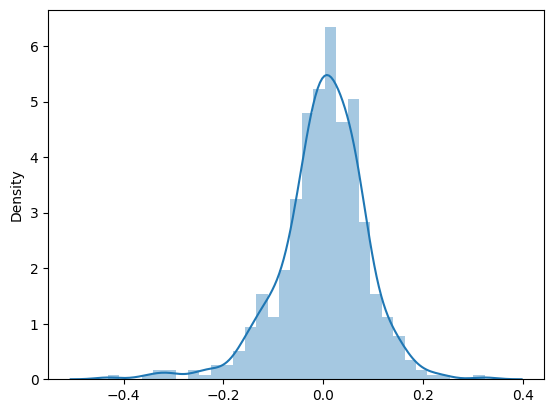

In [42]:
res = y_train - y_train_pred

sns.distplot(res)